# Import Data

In [1]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
train_path = os.path.join('datasets', 'train.csv')
test_path = os.path.join('datasets', 'test.csv')

train, test = pd.read_csv(train_path), pd.read_csv(test_path)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

# Analyze Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Summary of numerical features

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Summary of categorical features

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hansen, Mr. Claus Peter",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### We will now explore these various features and how they are connected to survival

### 1. Survivals
0 = Not survived
1 = Survived

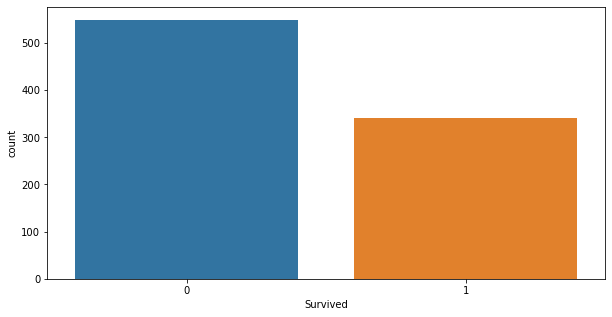

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Survived')
plt.show()

### 2. Pclass
1 = 1st, 2 = 2nd, 3 = 3rd

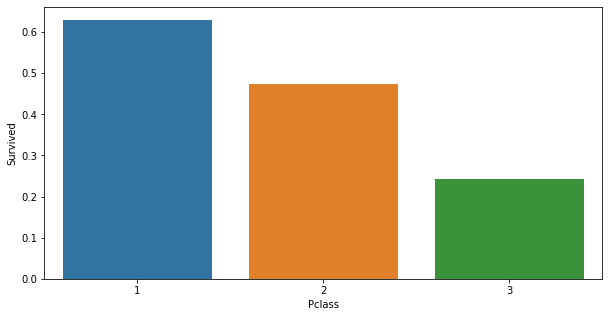

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(data=train, x='Pclass', y='Survived', ci=None)
plt.show()

### 3. Age
**Age missing values:** 177

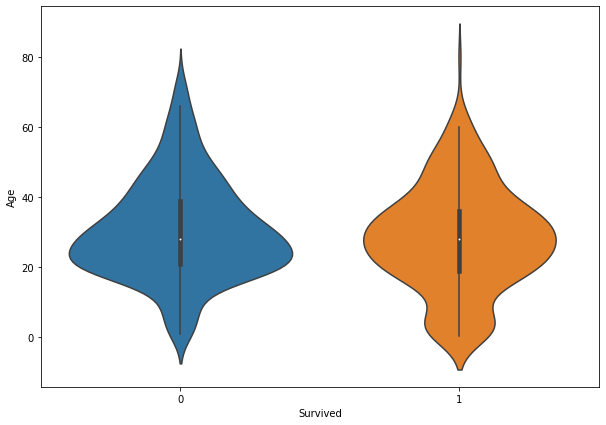

In [12]:
plt.figure(figsize = (10, 7))
sns.violinplot(y = 'Age', x = 'Survived', data = train)
plt.show()

### 4. SibSp
siblings / spouses aboard the Titanic

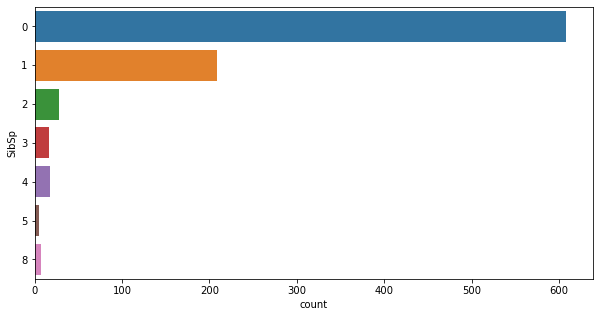

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, y='SibSp')
plt.show()

The majority of passengers did not have a spouse or sibling

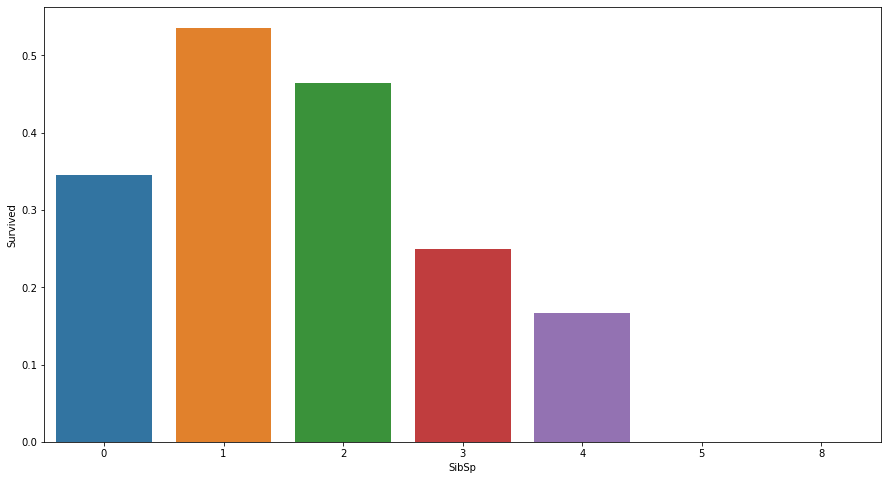

In [14]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=train, x='SibSp', y='Survived', ci=False)
plt.show()

### 5. Parch
parents / children aboard the Titanic

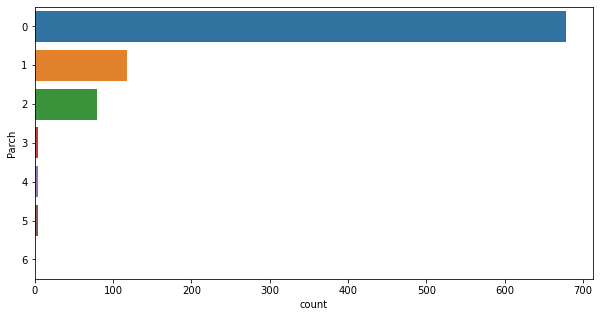

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, y='Parch')
plt.show()

The majority of passengers did not have a parents or children

### 6. Fare

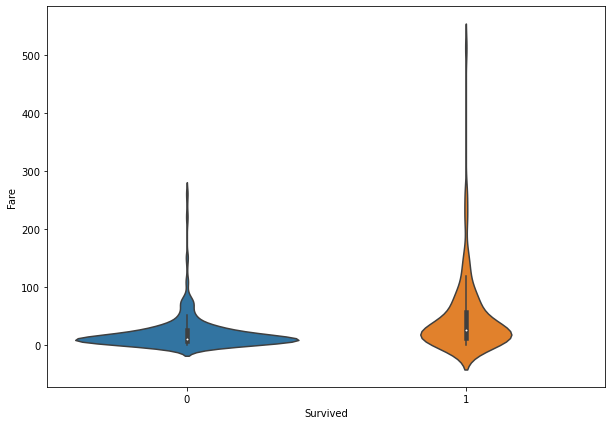

In [16]:
plt.figure(figsize = (10, 7))
sns.violinplot(y = 'Fare', x = 'Survived', data = train)
plt.show()

Seems like is not a relevant data

### 7. Sex

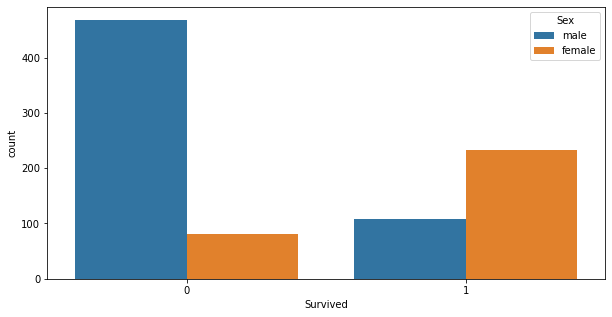

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Survived', hue='Sex')
plt.show()

We can see the vast majority who died was men.

### 8. Embarked

C = Cherbourg, Q = Queenstown, S = Southampton

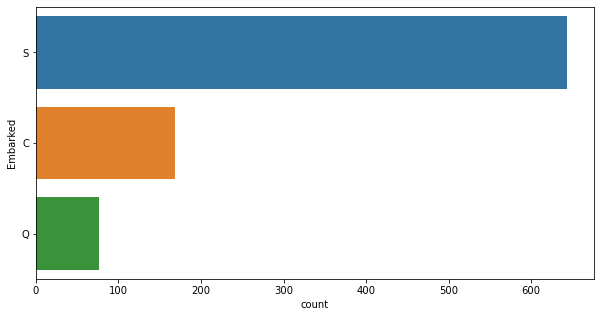

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, y='Embarked')
plt.show()

The majority of the passangers embarked from Southampton

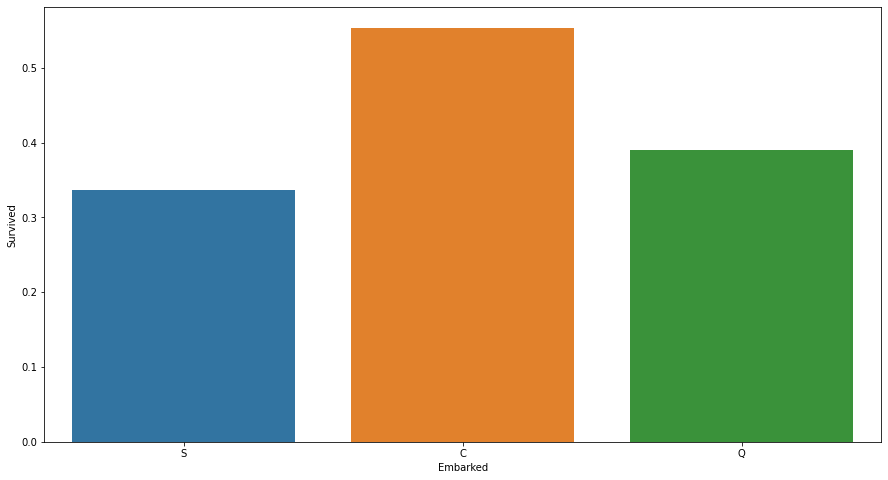

In [19]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=train, x='Embarked', y='Survived', ci=False)
plt.show()

## Looking for Correlations in numerical values

In [20]:
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# Prepare the Data

I consider Pclass features like a categorical, because de scalar value represent a category.

In [21]:
num_features = ['Fare', 'Parch', 'SibSp', 'Age']
cat_features = ['Sex', 'Pclass']
train_prepared = train[num_features + cat_features]

In [22]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('hot_encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [23]:
X_train = full_pipeline.fit_transform(train_prepared)
y_train = train['Survived']

# Select and Train a Model

## Logistic Regression

In [24]:
param_grid = {'C': np.arange(0.5, 10.5, 0.5),
              'penalty': ['l1', 'l2']}

gs = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=param_grid, cv=3, scoring='accuracy',
                  verbose=0, n_jobs=-1)

grid_result = gs.fit(X_train, y_train)

In [25]:
best_params = grid_result.best_params_
model_log = grid_result.best_estimator_

In [26]:
y_train_pred = cross_val_score(model_log, X_train, y_train, scoring='accuracy', cv=3)

In [27]:
print('Logistic Regression CV score:', y_train_pred.mean())
print('Logistic Regression CV loss:', y_train_pred.std())
print('Best Logistic Regression Parameters:', best_params)

Logistic Regression CV score: 0.7890011223344556
Logistic Regression CV loss: 0.0015872206087240053
Best Logistic Regression Parameters: {'C': 0.5, 'penalty': 'l2'}
